This code example shows the use of covseisnet to compute the covariance matrix and spectral width over two days at Whakaari volcano, both using two stations and also single-station.

Code starts by pulling in functions from the file covseisnetfunc.py. From this file, two primary functions are used. The first, run_covseisnet(), is responsible for the bulk of the computation, computing the spectral width between two dates for a given dataset, and saves the output as numpy arrays. The second, plotSpectralWidth(), plots this data (excuse the lack of consistency in naming convention!).

In [1]:
from covseisnetfunc import *

The function run_covseisnet(), which will search for data within the directory in the first argument (e.g. 'whakaari' located in 'data/', pulling all traces with the specified channel, between the dates gives (including the end date). Final compulsary argument is the output directory for covariance matrix, which stores the output for a given day as a numpy array within this directory containing times, frequencies, spectral widths, and station/trace count.

Optional argument include the 'average', corresponding to the number of subwindows to average for the covariance matrix computation, and the 'window_duration_sec' corresponding to the length of these subwindows. The optional argument 'dfac' corresponds to the decimation factor (default = 4). 

Optional argument 'stations' can be used to select which stations to use. By default this will be an empty array, and will compute spectral width using all stations in file. To use only certain stations, include these in array e.g. "stations = ['STAT1', 'STAT2']". If single-station, include only one station in array and set channel = '*' to compute using all channels. Also, you can decide whether to use onebit or smoothed method for temporal and spectoral normalisation during pre-processing using optional arguments 'norm' and 'spectral' (set to "onebit"(default) or "smooth"). Finally, can set printstream = True as an optional argument to print the stream as output for each day.

In [2]:
run_covseisnet('data/whakaari', 'HHZ','2017-01-01','2017-01-02','W001',average=100, window_duration_sec=100, dfac=4)

2021-02-04 18:07:15: Processing day 1, year 2017, from data in folder data/whakaari
2021-02-04 18:07:15: 2 traces pulled into stream. Pre-processing data...
2021-02-04 18:07:19: Pre-processing finished, computing spectral width.
2021-02-04 18:07:31: Finished computing spectral width, saving result
2021-02-04 18:07:31: Processing day 2, year 2017, from data in folder data/whakaari
2021-02-04 18:07:31: 2 traces pulled into stream. Pre-processing data...
2021-02-04 18:07:35: Pre-processing finished, computing spectral width.
2021-02-04 18:07:45: Finished computing spectral width, saving result


Function plotSpectralWidth() takes the directory where covseisnet results are stored as the first argument, and startdate and enddate as the second argument and third argument respectively. Optional arguments include 'log', a boolean to plot the frequencies as a logarithmic scale, and a boolean argument 'count' which will indicate whether the count of traces/stations is shown as a second plot underneath the spectral width plot. Optional boolean argument 'norm' can be used to normalize the spectral width (where it is divided by the maximum across all frequencies during each calculation).

/home/yatesal/covseisnet_ASY/covseisnetfunc.py:185: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = ax.pcolormesh(times, frequencies, spectral_width, rasterized=True, cmap="viridis_r", shading='auto')


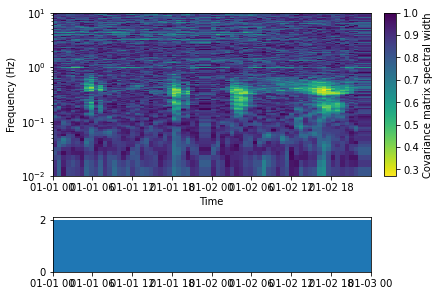

In [3]:
plotSpectralWidth('W001', '2017-01-01', '2017-01-02', log=True, count=True, norm=True)

Now adjusting the optional argument 'stations' for single-station, with station WIZ, saving to directory W002:

In [5]:
run_covseisnet('data/whakaari', '*','2017-01-01','2017-01-02','W002',average=100, window_duration_sec=100, stations=['WIZ'], dfac=4)

2021-02-04 18:13:56: Processing day 1, year 2017, from data in folder data/whakaari
2021-02-04 18:13:56: 3 traces pulled into stream. Pre-processing data...
2021-02-04 18:14:02: Pre-processing finished, computing spectral width.
2021-02-04 18:14:15: Finished computing spectral width, saving result
2021-02-04 18:14:15: Processing day 2, year 2017, from data in folder data/whakaari
2021-02-04 18:14:15: 3 traces pulled into stream. Pre-processing data...
2021-02-04 18:14:20: Pre-processing finished, computing spectral width.
2021-02-04 18:14:34: Finished computing spectral width, saving result


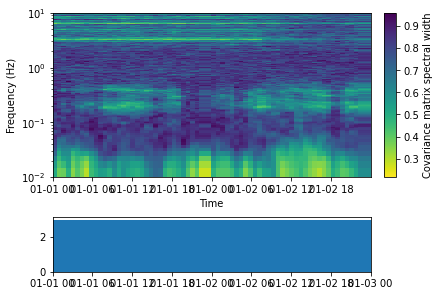

In [6]:
plotSpectralWidth('W002', '2017-01-01', '2017-01-02', log=True, count=True)